In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e19/sample_submission.csv
/kaggle/input/playground-series-s3e19/train.csv
/kaggle/input/playground-series-s3e19/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/playground-series-s3e19/train.csv")

In [3]:
df

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


In [4]:
df = df.drop(["id", "date"], axis = 1)

In [5]:
df

,country,store,product,num_sold
0,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...
136945,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


In [6]:
df["country"].unique()

array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object)

In [7]:
df["store"].unique()

array(['Kaggle Learn', 'Kaggle Store', 'Kagglazon'], dtype=object)

In [8]:
df["product"].unique()

array(['Using LLMs to Improve Your Coding',
       'Using LLMs to Train More LLMs',
       'Using LLMs to Win Friends and Influence People',
       'Using LLMs to Win More Kaggle Competitions',
       'Using LLMs to Write Better'], dtype=object)

In [9]:
df["country"] = pd.factorize(df["country"])[0] + 1
df["store"] = pd.factorize(df["store"])[0] + 1
df["product"] = pd.factorize(df["product"])[0] + 1

In [10]:
df

,country,store,product,num_sold
0,1,1,1,63
1,1,1,2,66
2,1,1,3,9
3,1,1,4,59
4,1,1,5,49
...,...,...,...,...
136945,5,3,1,700
136946,5,3,2,752
136947,5,3,3,111
136948,5,3,4,641


Correlation check

In [11]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
X = df.drop(["num_sold"], axis = 1)
y = df["num_sold"]

<Axes: >

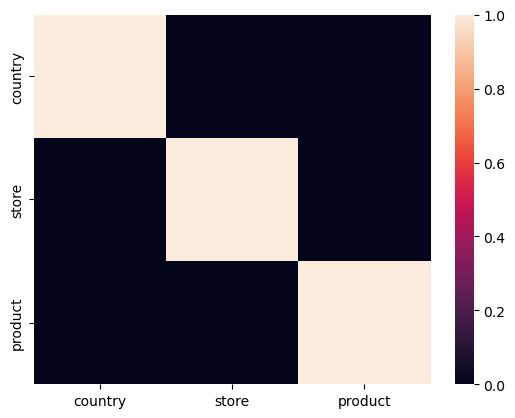

In [13]:
sns.heatmap(X.corr())


In [14]:
# from sklearn.linear_model import LinearRegression

In [15]:
# model = LinearRegression()
# model.fit(X, y)

In [16]:
from xgboost import XGBRegressor

In [17]:
xgboost_model = XGBRegressor()

In [18]:
xgboost_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
test_df = pd.read_csv("/kaggle/input/playground-series-s3e19/test.csv")

In [20]:
test_df["country"] = pd.factorize(test_df["country"])[0] + 1
test_df["store"] = pd.factorize(test_df["store"])[0] + 1
test_df["product"] = pd.factorize(test_df["product"])[0] + 1
test_ids = test_df["id"]
test_df = test_df.drop(["id", "date"], axis=1)

In [21]:
# result = model.predict(test_df)

In [22]:
xdg_result = xgboost_model.predict(test_df)

In [23]:
xdg_result

array([ 29.885544 ,  29.507668 ,   4.2376695, ...,  68.59521  ,
       370.5192   , 336.62598  ], dtype=float32)

In [24]:
true_result = []
for i in range(len(xdg_result)):
    true_result.append(int(xdg_result[i]))

In [25]:
submission_list = pd.DataFrame(list(zip(test_ids, true_result)), columns=["id", "num_sold"]) 
submission_list.to_csv("submission.csv", index=False)